# Generating Bakso, an Indonesian Food Images with Stable Diffusion XL and DreamBooth

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1sQfo0QiPq7Htur6_Q1aImt1qdmYl608r?usp=sharing)
[![Open in SageMaker Studio](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/adhiiisetiawan/SYN_DAM-TUTORIAL-PRICAI-2024/blob/main/Diffusion_Generate_Data.ipynb)

This notebook demonstrates how to generate images of Indonesian food using the Stable Diffusion XL model with DreamBooth fine-tuning. We'll use the `diffusers` and `transformers` libraries from Hugging Face to load the model, generate images based on text prompts, and customize the output.

**Key features:**

*   Leveraging Stable Diffusion XL for high-quality image generation.
*   Applying DreamBooth fine-tuning for Indonesian food specialization.
*   Generating multiple images with varying prompts and parameters.
*   Saving generated images to a designated folder.
*   Visualizing the generated images within the notebook.

**Requirements:**

*   Google Colab environment or a similar Jupyter Notebook setup.
*   A Hugging Face account for accessing the model.
*   Familiarity with Python and basic deep learning concepts.

**Let's get started!**

## Installing Necessary Libraries

This section installs the required libraries for our project using `pip`, the Python package installer.

**Explanation:**

We are installing the following important libraries:

* **`diffusers`:**  Provides pre-trained diffusion models for image generation.
* **`transformers`:** Enables working with transformer models for various NLP tasks, often used alongside diffusion models.
* **`scipy`:** A fundamental library for scientific computing in Python.
* **`ftfy`:** Fixes text encoding problems, ensuring smooth data processing.
* **`huggingface_hub`:**  Allows access to models and datasets from the Hugging Face Model Hub.
* **`peft`:** Stands for Parameter-Efficient Fine-Tuning and is useful for adapting large language models efficiently.


The `-q` flag ensures a quiet installation, and `--upgrade` updates any existing packages to the latest versions.

In [ ]:
%%sh
# pip install -q --upgrade pip
pip install -q --upgrade diffusers transformers scipy ftfy huggingface_hub peft

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.4/447.4 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 44.9 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


## Accessing the Stable Diffusion Model

|
To use the Stable Diffusion model, we need to log in to the Hugging Face Hub, which is where the model is hosted.

**Explanation:**

This code snippet performs the following actions:

1.  **`from huggingface_hub import notebook_login`:** Imports the `notebook_login` function from the `huggingface_hub` library. This function is specifically designed for logging in within a notebook environment like Google Colab.
2.  **`notebook_login()`:** Calls the `notebook_login` function, which will prompt you to enter your Hugging Face Hub credentials or create an account if you don't already have one. This step is essential to gain access to the Stable Diffusion model and other resources hosted on the Hub.

By logging in, you are granted permission to download and utilize the Stable Diffusion model for your image generation tasks.

In [ ]:
from huggingface_hub import notebook_login

# Required to get access to stable diffusion model
notebook_login()

## Loading the Stable Diffusion Model

Now, we'll load the Stable Diffusion XL Base 1.0 model into our environment.

**Explanation:**

This section focuses on loading the Stable Diffusion XL Base 1.0 model and preparing it for use:

1.  **`import torch`:** Imports the `torch` library, which is fundamental for deep learning operations and utilizing GPUs.
2.  **`from diffusers import DiffusionPipeline`:** Imports the `DiffusionPipeline` class from the `diffusers` library, which provides a streamlined way to interact with diffusion models.
3.  **`pipeline = DiffusionPipeline.from_pretrained(...)`:** This line is the core of the model loading process. It downloads and instantiates the Stable Diffusion XL Base 1.0 model using the `from_pretrained` method. The arguments specify the model's location on the Hugging Face Hub, data type, variant, and safety settings. The model is then moved to the CUDA device (GPU) using `.to("cuda")` to leverage GPU acceleration.
4.  **`pipeline.enable_model_cpu_offload()`:** This line enables CPU offloading, which can help manage GPU memory usage by storing parts of the model on the CPU when not actively used.
5.  **`pipeline.load_lora_weights(...)`:**  This part loads pre-trained LoRA (Low-Rank Adaptation) weights that specialize the model for a specific task. In this case, it's loading weights focused on generating images of Indonesian food. LoRA is a technique to fine-tune models efficiently by adding a small number of trainable parameters.

By the end of this section, you have a fully loaded and optimized Stable Diffusion model, ready to generate images based on your input prompts.

In [ ]:
import torch
from diffusers import DiffusionPipeline

# Load Stable Diffusion XL Base1.0
pipeline = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
).to("cuda")

# Optional CPU offloading to save some GPU Memory
pipeline.enable_model_cpu_offload()

# Loading Trained DreamBooth LoRA Weights
pipeline.load_lora_weights("adhisetiawan/sdxl-base-1.0-indonesian-food-dreambooth-lora")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

## Generating Images

This section uses the loaded model to generate images based on a specific prompt.

**Explanation:**

Here, we use the previously loaded Stable Diffusion pipeline to generate images:

1.  **`images = pipeline(...)`:** This line calls the `pipeline` object (which represents our loaded model) with the desired input parameters:
    *   **`"a bakso in a bowl"`:** This is the text prompt that guides the image generation process. The model will attempt to create images that visually represent this prompt.
    *   **`num_images_per_prompt=4`:** Specifies that we want to generate 4 images for the given prompt.
    *   **`guidance_scale=8`:** This parameter controls how closely the generated images adhere to the prompt. Higher values result in images that are more faithful to the prompt but may be less creative.
2.  **`images`:**  This line displays the generated images within the notebook.

This process essentially sends the prompt to the Stable Diffusion model, which then uses its internal knowledge and the LoRA weights (focused on Indonesian food) to synthesize images that match the description.

In [ ]:
images = pipeline(
            "a bakso in a bowl", num_images_per_prompt=4, guidance_scale=8
        )
images

  0%|          | 0/50 [00:00<?, ?it/s]

StableDiffusionXLPipelineOutput(images=[<PIL.Image.Image image mode=RGB size=1024x1024 at 0x79897949F130>, <PIL.Image.Image image mode=RGB size=1024x1024 at 0x79897949EC20>, <PIL.Image.Image image mode=RGB size=1024x1024 at 0x79897949EB00>, <PIL.Image.Image image mode=RGB size=1024x1024 at 0x79897949F6A0>])

## Displaying Generated Images

This section displays the generated images using the IPython library.

**Explanation:**

This code snippet takes the generated images and displays them within the notebook environment:

1.  **`from IPython.display import Image, display`:** Imports necessary components from the `IPython.display` module to handle image display.
2.  **`for i in range(len(images.images)):`:** This loop iterates through each image stored in the `images.images` list (which was obtained from the previous step).
3.  **`display(images.images[i])`:** Inside the loop, the `display` function is used to show each image directly within the notebook.

This allows you to visually inspect the images that the Stable Diffusion model has created based on your input prompt and parameters.

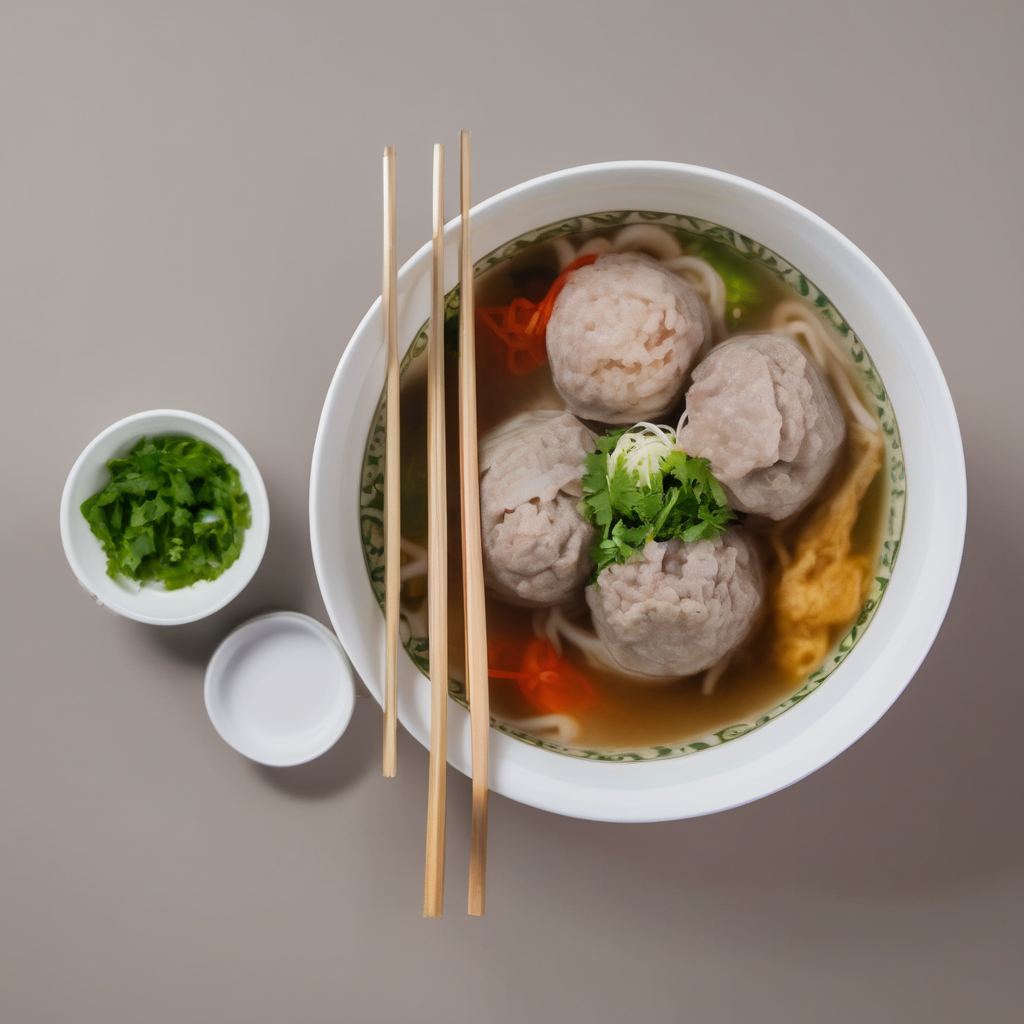

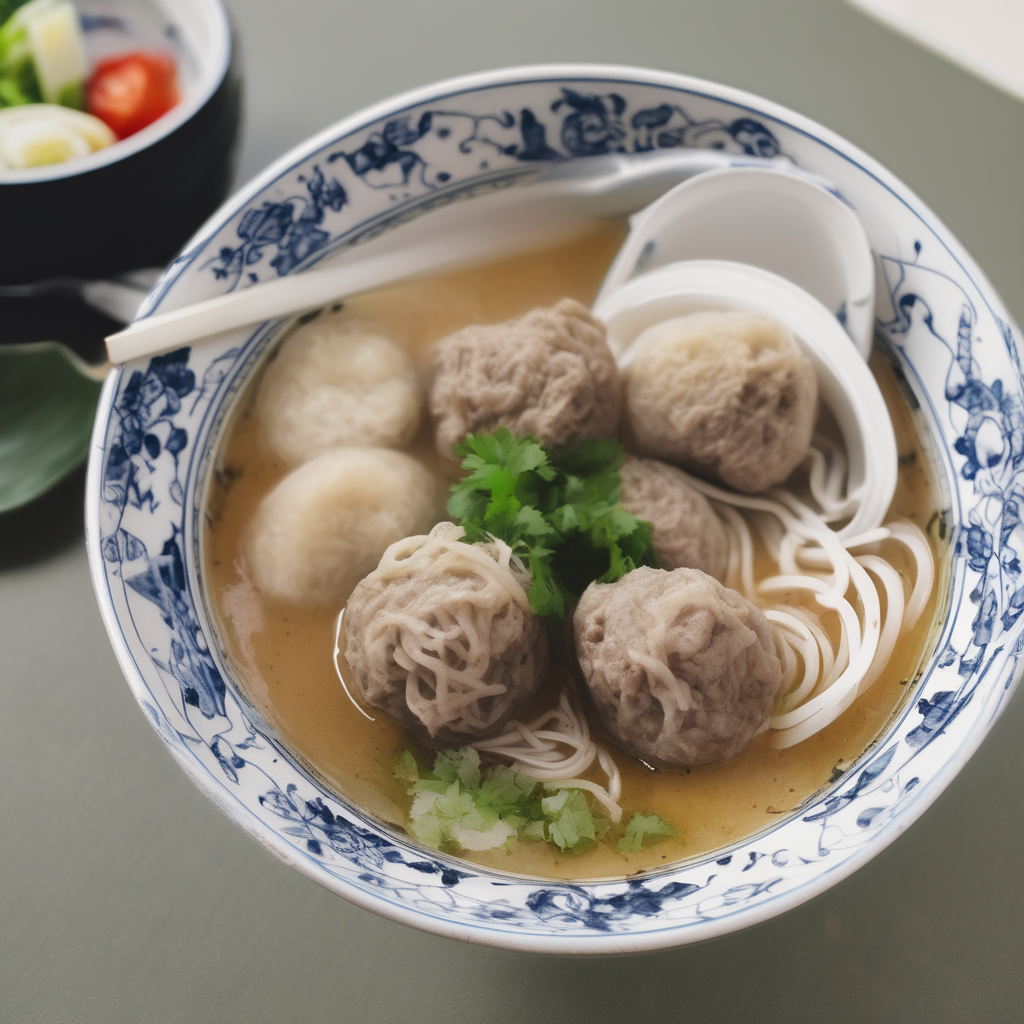

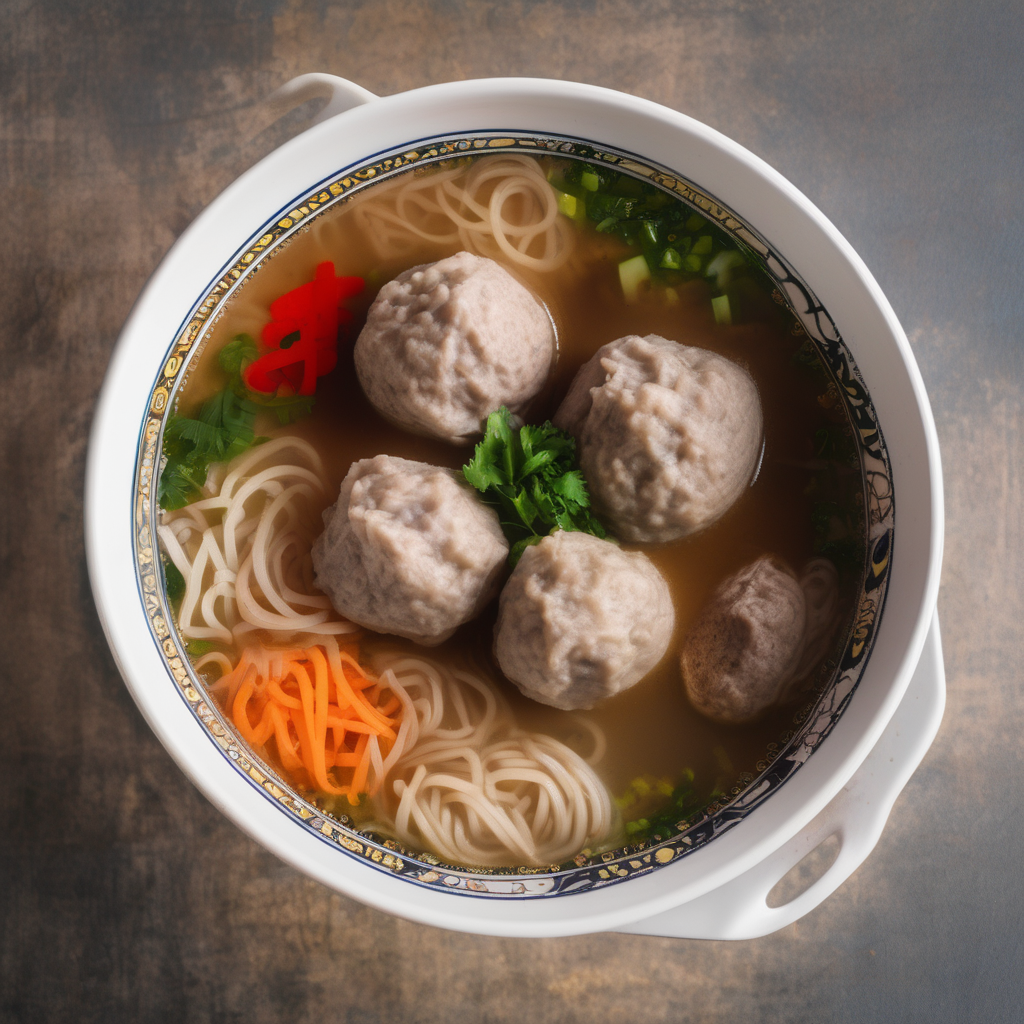

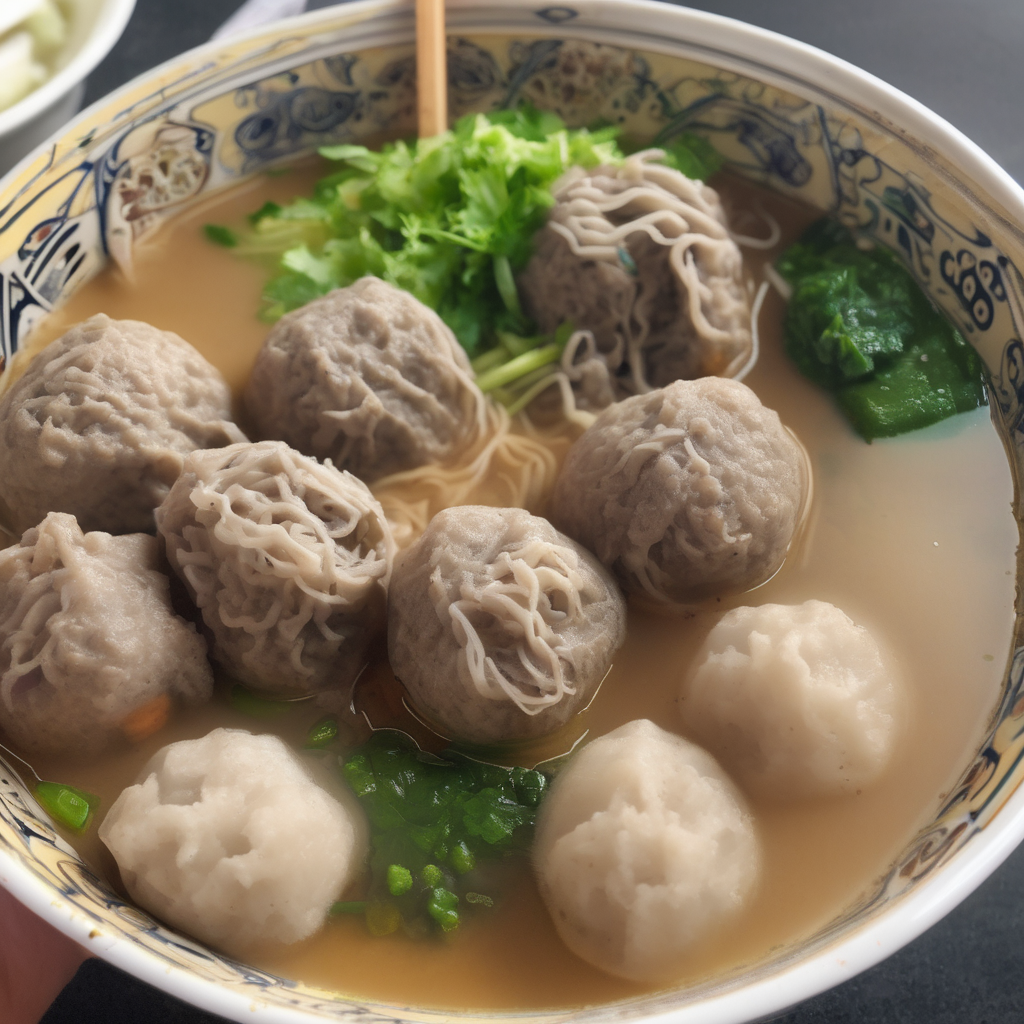

In [ ]:
from IPython.display import Image, display

for i in range(len(images.images)):
  display(images.images[i])

## Function for Generating and Saving Multiple Images

This section defines a function to generate multiple images and save them to a directory.

**Explanation:**

This code defines a function called `generate_images` that streamlines the process of generating and saving multiple images:

1.  **`import os` and `import time`:** Import necessary modules for file system operations (`os`) and time tracking (`time`).
2.  **`def generate_images(...)`:** Defines the function, taking parameters such as the prompt, number of images to generate, guidance scale, output directory, and whether to display the images.
3.  **`start_time = time.time()`:** Records the starting time to measure the total generation time.
4.  **`num_iterations ...` and `os.makedirs ...`:** Calculates the number of iterations needed based on the desired number of images and creates the output directory if it doesn't exist.
5.  **`for i in range(num_iterations):`:** This outer loop controls the number of times the image generation process is repeated.
6.  **`images = pipeline(...)`:** Inside the outer loop, this line generates images using the `pipeline` object with the specified prompt and parameters.
7.  **`for idx, image in enumerate(images.images):`:** This inner loop iterates through each generated image in the current batch.
8.  **`image_name = ...` and `image.save(...)`:**  Constructs a unique filename for each image and saves it to the output directory.
9.  **`total_time = ...` and `print(...)`:** Calculates and prints the total time taken for the image generation process.

This function simplifies generating multiple images with specific parameters and automatically saves them to a designated folder.

In [ ]:
import os
import time



def generate_images(
    prompt,
    num_images_to_generate,
    num_images_per_prompt=4,
    guidance_scale=8,
    output_dir="images",
    display_images=False,
):
    start_time = time.time()
    num_iterations = num_images_to_generate // num_images_per_prompt
    os.makedirs(output_dir, exist_ok=True)

    for i in range(num_iterations):
        images = pipeline(
            prompt, num_images_per_prompt=num_images_per_prompt, guidance_scale=guidance_scale
        )
        for idx, image in enumerate(images.images):
            image_name = f"{output_dir}/image_{(i*num_images_per_prompt)+idx}.png"
            image.save(image_name)
            # if display_images:
            #     display(Image(filename=image_name, width=128, height=128))
    total_time = time.time() - start_time
    print(f"\nTotal generation time: {total_time:.2f} seconds")

In [ ]:
 # 1000 images take just under an 1 hour on a V100

generate_images("a bakso in a bowl", num_images_to_generate=4, guidance_scale=4, display_images=True)

  0%|          | 0/50 [00:00<?, ?it/s]


Total generation time: 212.55 seconds
